# K-means clustering

K-means clustering is a useful tool for categorizing stocks based on shared financial characteristics. By selecting and normalizing relevant features, such as price-to-earnings ratio or volatility, the algorithm groups stocks into clusters. The number of clusters, denoted as K, is determined beforehand. This technique aids in identifying similarities among stocks, offering insights for portfolio management and risk analysis. Visualization helps validate the clustering results. While K-means clustering provides valuable insights, careful consideration of feature selection and interpretation is essential for meaningful outcomes.







## Aim

Cluster NIFTY50 companies into different clusters based on past 1-year volatility and returns.

# 1. Import necessary liabraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yfinance as yf

warnings.filterwarnings('ignore')

## 2. Stocks data

In [2]:
# Nifty 50 companies
stock_list = ['ADANIENT','ADANIPORTS','APOLLOHOSP','ASIANPAINT','AXISBANK','BAJAJ-AUTO','BAJFINANCE','BAJAJFINSV','BPCL',
'BHARTIARTL','BRITANNIA','CIPLA','COALINDIA','DIVISLAB','DRREDDY','EICHERMOT','GRASIM','HCLTECH','HDFCBANK','HDFCLIFE',
'HEROMOTOCO','HINDALCO','HINDUNILVR','ICICIBANK','ITC','INDUSINDBK','INFY','JSWSTEEL','KOTAKBANK','LTIM','LT','M&M',
'MARUTI','NTPC','NESTLEIND','ONGC','POWERGRID','RELIANCE','SBILIFE','SBIN','SUNPHARMA','TCS','TATACONSUM','TATAMOTORS',
'TATASTEEL', 'TECHM', 'TITAN', 'UPL', 'ULTRACEMCO','WIPRO']

In [3]:
# Download past 1-year data for all symbols
data = yf.download([ x+'.NS'for x in stock_list], period='1y', auto_adjust=True)

# Extract Close data
data = data['Close']

[*********************100%***********************]  50 of 50 completed


In [4]:
# Drop NaN values
data.dropna(axis=1, inplace=True)

## 3. Feature Extraction

In [5]:
# Create an empty dataframe
stocks_df = pd.DataFrame()

# Generate features
stocks_df['returns'] = (data.pct_change().dropna() + 1).prod() - 1
stocks_df['volatility'] = data.pct_change().dropna().std() * np.sqrt(252)

In [6]:
# Verify summary statistics
stocks_df.describe()

,returns,volatility
count,50.000000,50.000000
mean,0.393897,0.237021
std,0.417584,0.121391
min,-0.867667,0.153001
25%,0.183898,0.187899
50%,0.280554,0.213760
75%,0.552242,0.242969
max,1.746092,0.925012


<Axes: xlabel='returns', ylabel='volatility'>

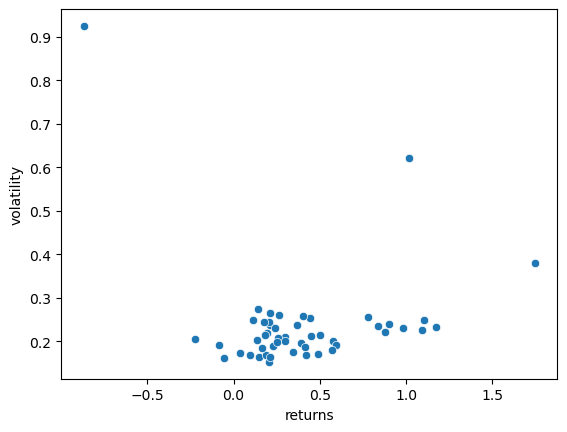

In [7]:
# Visualize how returns and volatility are related
sns.scatterplot(stocks_df, x='returns', y='volatility')

## 4. Feature Scaling

In [8]:
# Import the required library
from sklearn.preprocessing import StandardScaler

In [9]:
# Define a scaler object
scaler = StandardScaler()
stocks_df_scaled = scaler.fit_transform(stocks_df)

In [10]:
# Store the scaled data
stocks_df = pd.DataFrame(stocks_df_scaled, columns=['returns', 'volatility'])

In [11]:
# Verify the summary statistics
stocks_df.describe()

,returns,volatility
count,5.000000e+01,5.000000e+01
mean,1.110223e-17,4.019007e-16
std,1.010153e+00,1.010153e+00
min,-3.051778e+00,-6.991718e-01
25%,-5.079973e-01,-4.087651e-01
50%,-2.741815e-01,-1.935678e-01
75%,3.830428e-01,4.949504e-02
max,3.271019e+00,5.725100e+00


## 5. Perform Clustering (Build Model)

In [12]:
# Import the K-Means algorithm
from sklearn.cluster import KMeans

In [13]:
KMeans?

In [14]:
# Build the model
km_model = KMeans(n_clusters=6).fit(stocks_df)

n_clusters=6: This parameter specifies the number of clusters that the algorithm should aim to create. In this case, it's set to 6, meaning that the algorithm will try to group the data into six clusters.

In [15]:
# Obtain a list of cluster labels
stocks_df['cluster'] = km_model.labels_

km_model.labels_: The labels_ attribute of the KMeans model contains the cluster labels assigned to each data point in the input dataset during the fitting process.

=: The assignment operator is used to assign the cluster labels obtained from km_model.labels_ to the newly created 'cluster' column.

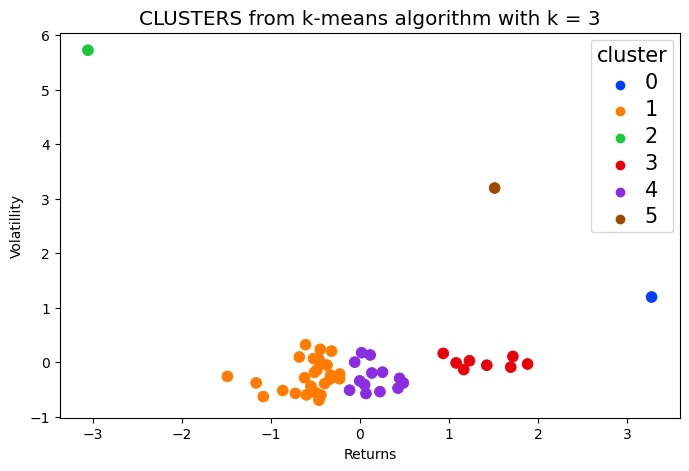

In [16]:
# Set graph size
plt.figure(figsize=(8, 5))

# Set x and y axis labels
ax = sns.scatterplot(y="volatility", x="returns", edgecolor='face', hue="cluster", 
                     data=stocks_df, palette='bright', s=60)

# Plot the graph
plt.xlabel('Returns')
plt.ylabel('Volatillity')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='15')
plt.title('CLUSTERS from k-means algorithm with k = 3', fontsize='x-large')
plt.show()

y="volatility" and x="returns": These parameters specify the variables to be plotted on the y-axis and x-axis, respectively. In this case, the "volatility" column is plotted on the y-axis, and the "returns" column is plotted on the x-axis.

edgecolor='face': This parameter sets the edge color of the markers to be the same as the face color. It can be used to make the markers visually seamless.

hue="cluster": This parameter assigns colors to data points based on the values in the "cluster" column. Each cluster will be represented by a different color in the plot.

data=stocks_df: This parameter specifies the DataFrame (stocks_df) containing the data to be plotted.

palette='bright': This parameter sets the color palette to be used for the clusters. The 'bright' palette typically includes a set of distinct and visually appealing colors.

s=60: This parameter sets the size of the markers in the scatter plot. In this case, markers are set to be relatively large (size 60).

ax = ...: This line assigns the resulting plot to the variable ax. This variable can be used later to modify or annotate the plot if needed.

### Model Intertia

Inertia measures how well a dataset was clustered by K-Means.

The below code calculates the inertia for different numbers of clusters (k) using the K-Means algorithm. Inertia is a measure of how well a dataset was clustered by K-Means, and it represents the sum of squared distances between data points and their assigned cluster centers. Lower inertia values indicate better-defined clusters. 

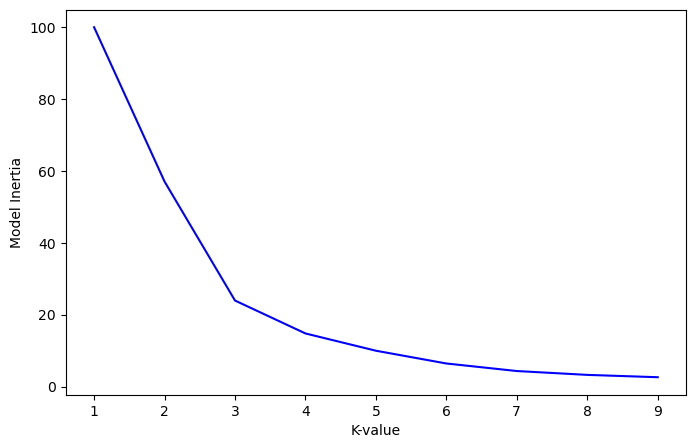

In [17]:
 # Calculating inertia for k-means models
# with different values of 'k'
inertia = []

k_range = range(1, 10) # Range of values for the number of clusters (k)

for k in k_range:
    model = KMeans(n_clusters=k) # Create a K-Means model with k clusters
    model.fit(stocks_df[['returns', 'volatility']]) # Fit the model to the specified features
    inertia.append(model.inertia_) # Append the inertia value to the list

# Plotting the 'elbow curve'
plt.figure(figsize=(8, 5))
plt.xlabel('K-value')
plt.ylabel('Model Inertia')
plt.plot(k_range, inertia, color='blue')
plt.show()

In [21]:


# Create a new column 'Company' to store the stock symbols
stocks_df['Company'] = stock_list

# Display the cluster assignment for each company in ascending order of clusters
clustered_stock = stocks_df[['Company', 'cluster']].sort_values(by='cluster')
print(clustered_stock)


       Company  cluster
1   ADANIPORTS        0
49       WIPRO        1
37    RELIANCE        1
32      MARUTI        1
31         M&M        1
30          LT        1
28   KOTAKBANK        1
27    JSWSTEEL        1
26        INFY        1
25  INDUSINDBK        1
48  ULTRACEMCO        1
23   ICICIBANK        1
22  HINDUNILVR        1
21    HINDALCO        1
38     SBILIFE        1
18    HDFCBANK        1
19    HDFCLIFE        1
6   BAJFINANCE        1
3   ASIANPAINT        1
4     AXISBANK        1
43  TATAMOTORS        1
7   BAJAJFINSV        1
10   BRITANNIA        1
39        SBIN        1
13    DIVISLAB        1
44   TATASTEEL        1
15   EICHERMOT        1
33        NTPC        2
12   COALINDIA        3
9   BHARTIARTL        3
20  HEROMOTOCO        3
5   BAJAJ-AUTO        3
34   NESTLEIND        3
35        ONGC        3
36   POWERGRID        3
42  TATACONSUM        3
46       TITAN        4
41         TCS        4
47         UPL        4
45       TECHM        4
24         ITC  